# **Diabetes Logistic Regression Model**

Names: Sadia Khan Durani, Eric Yee, Jaden Lai, Danial Ramzan

In [123]:
# Necessary Import Statements
library(tidyverse)
library(repr)
library(GGally)
library(caret)
library(rsample)
library(MASS)

In [124]:
# Loading the dataset into R
diabetes <- read.csv("https://raw.githubusercontent.com/sadia-kd/STAT-301-Project/main/data/diabetes-2.csv")
# Set seed
set.seed(123)

# **Introduction**

The `diabetes` dataset is sourced from the National Institute of Diabetes and Digestive and Kidney Diseases in the United States. It consists of 9 variables in total and 768 observations. The data was taken from female patients of minimum 21 years of age and of Pima Indian Heritage. Some uses of this dataset can be in cases when one wants to learn the factors which could predict the presence of Diabetes, particularly for the female population, using different statistical methods. 

In [125]:
head(diabetes, 3)

# Main developer: Jaden

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35            0       33.6
2 1            85     66            29            0       26.6
3 8           183     64             0            0       23.3
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1

The 9 variables in this dataset are:

| Variable | Description |
|----------|-------------|
| `Pregnancies` | Number of times pregnant |
| `Glucose` | Glucose Level (mg/dL) |
| `BloodPressure` | Blood Pressure Measurement (mm Hg) |
| `SkinThickness` | Thickness of the Skin (mm)|
| `Insulin` | Insulin Level in Blood ($\mu$U/ml |
| `BMI` | Body Mass Index (Weight in kg / (Height in m$)^2$)|
| `DiabetesPedigreeFunction` | Diabetes Pedigree Function |
| `Age` | Age (years) |
| **Response**: `Outcome` | 1 indicates diabetic and 0 indicates non-diabetic |

<br>

In [126]:
# Number of columns
num_cols <- ncol(diabetes)
cat("This dataset has", num_cols ,"variables.")

# Main developer: Sadia

This dataset has 9 variables.

In [127]:
# Number of rows
n <- nrow(diabetes)
cat("This dataset has", n ,"observations.")

# Main developer: Sadia

This dataset has 768 observations.

<br>

## **Question goes into introduction**

Our random variable of interest, the response, will be the 'Outcome' variable looking at whether the female patient has diabetes or not. Therefore, the questions I will try to answer using the Diabetes Dataset is:

- Which variables are associated with the probability of a female patient being diabetic or not?
- How accurately can we predict whether a female patient has diabetes or not based on the significant variables found?

The dataset will assist in answering the questions above as the data is observational. The first question is focused on inference, as I look into identifying the associated explanatory variables with the response variable. Through statistical inferences about the data, I will look into identifying the variables that have a significant association with 'Outcome'. The second question is focused on prediction as I plan to build a model to use and see how well it can predict the 'Outcome' variable of unseen observations.

<br>

# **Methods and Results**

## Exploratory Data Analysis

In [128]:
# The dataset has been loaded into R above

# Display the top 3 rows of the dataset
head(diabetes, 3)

# Main developer: Jaden

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35            0       33.6
2 1            85     66            29            0       26.6
3 8           183     64             0            0       23.3
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1

`Outcome` is our response variable in our model which is either 1 or 0. Thus, we should convert it from type `integer` to type `factor`.

In [129]:
diabetes$Outcome <- as.factor(diabetes$Outcome)

# Main developer: Jaden

In [130]:
# Check for missing data in any of the columns
colSums(is.na(diabetes))

# Main developer: Sadia

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

The Diabetes Dataset does not have any missing values (NA). However, notice that `SkinThickness` and `Insulin` are 0 for patients 1, 2, and 3. This is not plausible so we see that missing values were replaced with 0 in this dataset. We know that 0 is not plausible for the measurements/variables `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` for any patient. Thus, we remove these values and assign the cleaned data to `diabetes_clean`.

In [131]:
diabetes_clean <- diabetes %>%
  filter(Glucose != 0,
         BloodPressure != 0,
         SkinThickness != 0,
         Insulin != 0,
         BMI != 0)

head(diabetes_clean, 3)
n_new <- nrow(diabetes_clean)
cat("The cleaned data has", n_new ,"observations.")

# Main developer: Jaden
# Contributor: Sadia (Print)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 1            89     66            23             94     28.1
2 0           137     40            35            168     43.1
3 3            78     50            32             88     31.0
  DiabetesPedigreeFunction Age Outcome
1 0.167                    21  0      
2 2.288                    33  1      
3 0.248                    26  1

The cleaned data has 392 observations.

In [132]:
# Find the number of observations in each Outcome category
count_in_outcome <- diabetes_clean %>%
    group_by(Outcome) %>%
    summarise(count = n())

count_in_outcome

# Main developer: Sadia

Outcome count
1 0       262  
2 1       130

We have 262 female patients that are non-diabetic and 130 patients that are diabetic in this dataset. This could be problematic as we do not have a balanced dataset. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


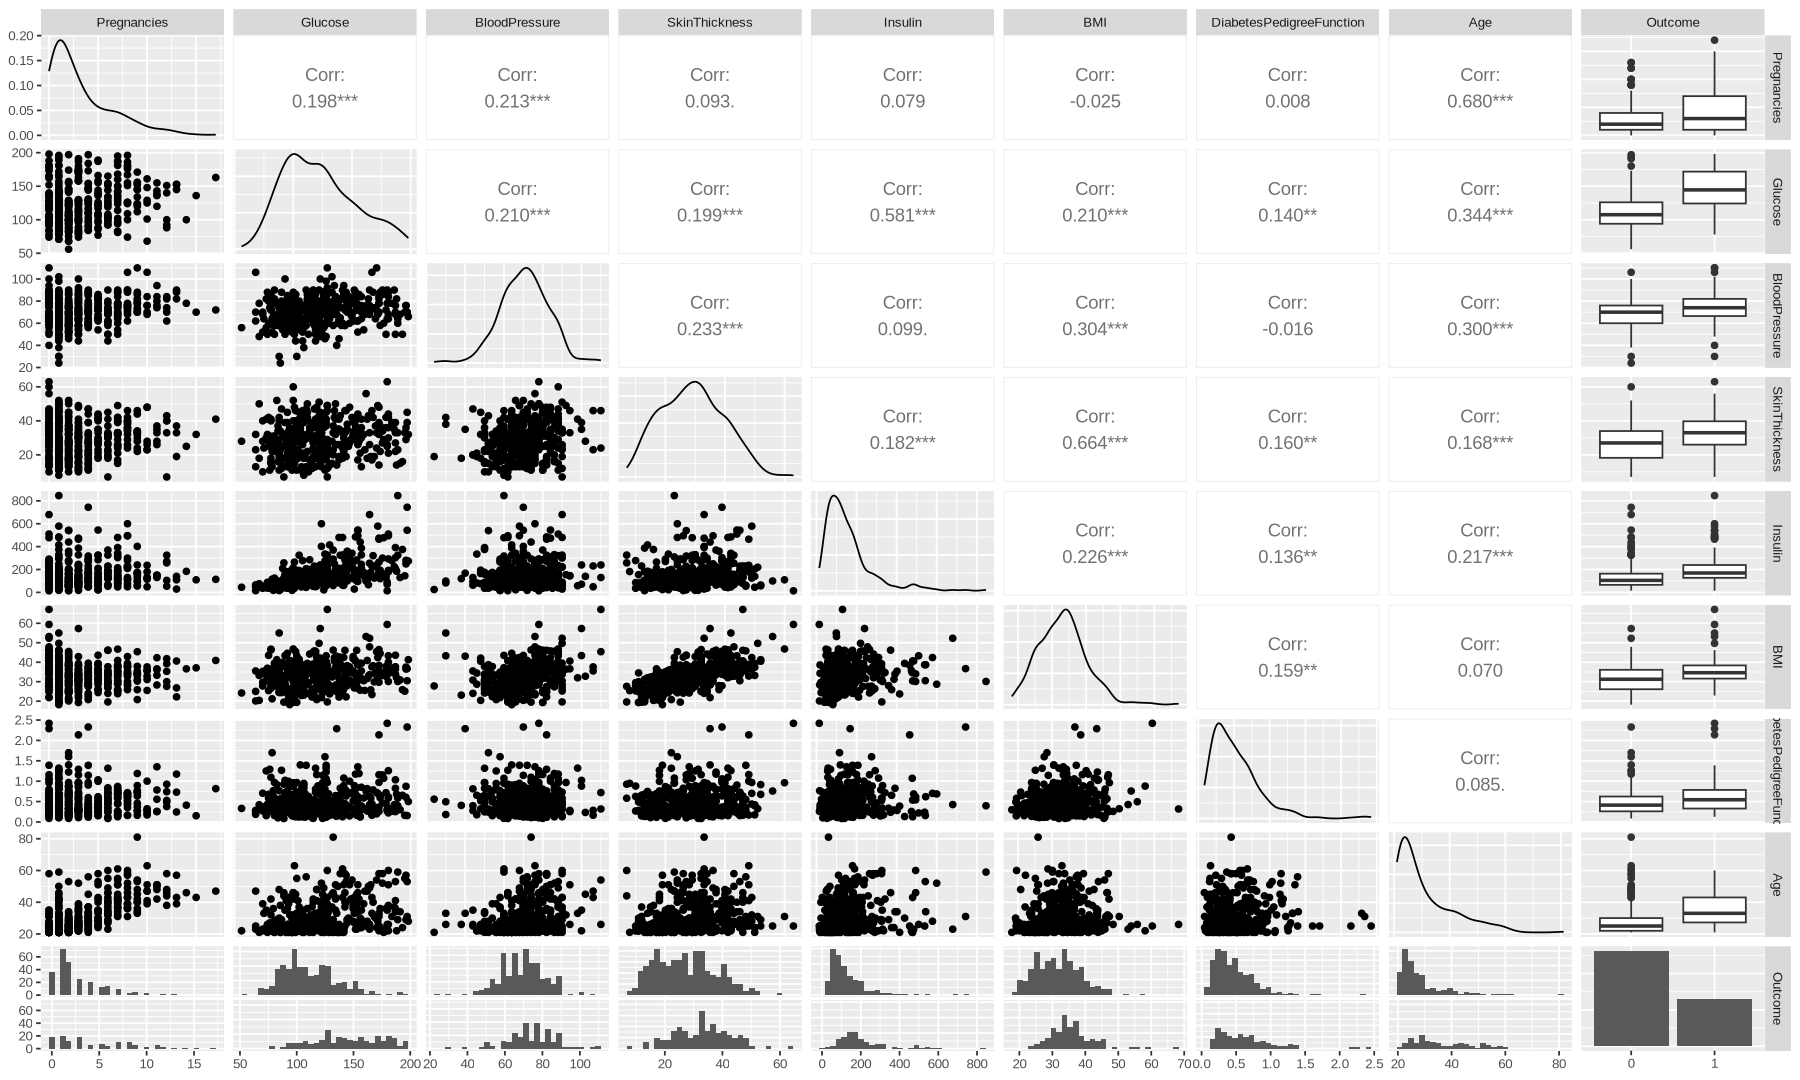

In [133]:
options(repr.plot.width = 15, repr.plot.height = 9) 

diabetes_pair_plots <- 
  diabetes_clean %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
diabetes_pair_plots

# Main developer: Jaden

A GGPairs Plot is useful here as the variables (excluding the response) are all numerical. This can make it easier to explore the data for our analysis. The highest correlation is 0.680 between `Age` and `Pregnancies`, and `BMI` and `SkinThickness`.

By observing the `Outcome` column , we see that the median for every explanatory variable in a patient *with* diabetes is higher. For `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, and `Age`, we see a noticable increase in interquartile range for patients *with* diabetes compared to those without diabetes. Specifically, the interquartile range for `Glucose`, `Insulin`, `BMI`, and `Age` of patients with diabetes is higher than their corresponding median value of patients without diabetes. This plot suggests that `Glocuse`, `Insulin`,`BMI`, and `Age` in our most accurate models could be more plausible, whereas variables iwth higher correlation may not.

<br>

# **Methods: Plan**

First, we'll split the data into training and testing sets so that we can evaluate our final model's accuracy later.

In [134]:
set.seed(123)

# Split data into training and testing sets with a 70/30 split
split <- initial_split(diabetes_clean, prop = 0.7)
diabetes_train <- training(split)
diabetes_test <- testing(split)

# Main developer: Eric 

We plan to use the `StepAIC` function from the `MASS` package in order to find the best parameters for models of different sizes using forward selection. However, this function stops stepping once the AIC starts to increase instead of decrease when the model grows larger in size, so we won't be looking at all possible model sizes. To use `StepAIC`, we need to create two models with all and no parameters in order to set the bounds of the models we want to step through. 

In [135]:
# Create full model with all 8 predictors
full_diabetes_logistic = glm(Outcome ~ ., family = "binomial", data = diabetes_train)

# Create null model
null_diabetes_logistic = glm(Outcome ~ 1, family = "binomial", data = diabetes_train)

# Forward selection using stepAIC() from MASS package
step_model <- stepAIC(fitNull, scope = list(lower = fitNull, upper = fitAll), direction = "forward")
step_model

# Main developer: Jaden

Start:  AIC=355.67
Outcome ~ 1

                           Df Deviance    AIC
+ Glucose                   1   262.54 266.54
+ Insulin                   1   322.61 326.61
+ Age                       1   323.34 327.34
+ BMI                       1   327.43 331.43
+ SkinThickness             1   335.00 339.00
+ DiabetesPedigreeFunction  1   341.68 345.68
+ BloodPressure             1   343.56 347.56
+ Pregnancies               1   343.74 347.74
<none>                          353.67 355.67

Step:  AIC=266.54
Outcome ~ Glucose

                           Df Deviance    AIC
+ BMI                       1   250.22 256.22
+ DiabetesPedigreeFunction  1   254.55 260.55
+ SkinThickness             1   254.83 260.83
+ Age                       1   256.55 262.55
<none>                          262.54 266.54
+ BloodPressure             1   260.90 266.90
+ Pregnancies               1   261.16 267.16
+ Insulin                   1   262.32 268.32

Step:  AIC=256.22
Outcome ~ Glucose + BMI

            


Call:  glm(formula = Outcome ~ Glucose + BMI + Age + DiabetesPedigreeFunction, 
    family = "binomial", data = diabetes_train)

Coefficients:
             (Intercept)                   Glucose                       BMI  
               -10.60175                   0.04228                   0.07893  
                     Age  DiabetesPedigreeFunction  
                 0.04020                   1.14273  

Degrees of Freedom: 273 Total (i.e. Null);  269 Residual
Null Deviance:	    353.7 
Residual Deviance: 238.2 	AIC: 248.2

Now that we know which parameters are best in each model of different sizes (up to size 5), we can perform cross validation on each one to measure their accuracies. Cross validation is less prone to variance from the training/testing data split.

In [136]:
# Set number of folds for cross validation
cv_control <- trainControl(method = "cv", number = 5)

# Main developer: Eric

In [137]:
set.seed(123)

# Model of size 1 with lowest AIC from forward selection
model_1_cv <- train(
    as.formula(Outcome ~ Glucose),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_1_cv_accuracy <- model_1_cv$results %>%
    pull(Accuracy)
model_1_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7556902

In [138]:
set.seed(123)

# Model of size 2 with lowest AIC from forward selection
model_2_cv <- train(
    as.formula(Outcome ~ Glucose + Age),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_2_cv_accuracy <- model_2_cv$results %>%
    pull(Accuracy)
model_2_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7739394

In [139]:
set.seed(123)

# Model of size 3 with lowest AIC from forward selection
model_3_cv <- train(
    as.formula(Outcome ~ Glucose + Age + BMI),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_3_cv_accuracy <- model_3_cv$results %>%
    pull(Accuracy)
model_3_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7957576

In [140]:
set.seed(123)

# Model of size 4 with lowest AIC from forward selection
model_4_cv <- train(
    as.formula(Outcome ~ Glucose + Age + BMI + DiabetesPedigreeFunction),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_4_cv_accuracy <- model_4_cv$results %>%
    pull(Accuracy)
model_4_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7921212

In [141]:
set.seed(123)

# Model of size 5 with lowest AIC from forward selection

model_5_cv <- train(
    as.formula(Outcome ~ Glucose + Age + BMI + DiabetesPedigreeFunction + Pregnancies),
    data = diabetes_train,
    method = "glm",
    family = "binomial",
    trControl = cv_control
)

# Compute model's accuracy
model_5_cv_accuracy <- model_5_cv$results %>%
    pull(Accuracy)
model_5_cv_accuracy

# Main developer: Eric (Cross Validation)
# Contributor: Jaden (Accuracy)

[1] 0.7921212

The model with 3 parameters had the highest accuracy, despite it having a higher AIC seen in the forward selection process. However, the accuracies of each model are fairly close, and because AIC is a better metric to compare models of different sizes since it takes size into consideration, we'll still use the model of size 5 for our final model.

In [142]:
set.seed(123)

# Create logistic regression model size 3
model_size_3 <- glm(Outcome ~ Glucose + Age + BMI, 
                    family = "binomial", 
                    data = diabetes_clean)

# Use model_size_3 to predict Outcome results on testing set
predicted_outcome_test <- if_else(predict(model_size_3, newdata = diabetes_test, type = "response") > 0.5, "1", "0")

# Obtain testing set outcomes
actual_outcome_test <- diabetes_test$Outcome

# Compute accuracy of predicted results
accuracy <- mean(predicted_outcome_test == actual_outcome_test)
accuracy

# Main developer: Jaden

[1] 0.8050847

We tested it against our testing data to get a final accuracy score of 80.5%.

# **Discussion**

Re-Stating Questions of Interest:

(1) Which variables are associated with the probability of a female patient being diabetic or not?

(2) How accurately can we predict whether a female patient has diabetes or not based on the significant variables found?

For our analysis, we will begin by splitting our data into training and testing sets so we can evaluate our model in the end. 

To address our first question, the method I will use is an automated procedure, specifically, forward selection, with logistic regression since our response is a binary variable. Forward selection will allow me to find the best model out of all the possible models of different sizes based on the chosen criterion. A limitation might be that forward selection might take a long time to run but should be manageable with 8 variables.

The assumptions needed to apply Logistic Regression are to have a binary response variable, to have independent observations, and to have no multicollinearity present between the input variables.

To address our second question, we will use our final model to predict the testing set's 'Outcome' variable. Then assses our predictions using classification metrics such as accuracy, recall or precision. Accuracy may not be the best metric since we saw there is a class imblance in the response variable.

<br>

# **References:**

Dataset: https://www.kaggle.com/datasets/whenamancodes/predict-diabities?resource=download

<br>